In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Графики


In [3]:
total = pd.read_csv('total_IC50.csv')
total = total.drop(['Unnamed: 0'], axis = 1)

In [4]:
total['ratio'] = total['value_F'] / total['value_H']

In [5]:
a = (total['ratio'] == 1).mean()
b = (total['ratio'] < 1).mean()
c = (total['ratio'] > 1).mean()
print('%.3f доля неизменившихся значений' %a)
print('%.3f доля уменьшившихся значений' %b)
print('%.3f доля увеличившихся значений' %c)

0.131 доля неизменившихся значений
0.451 доля уменьшившихся значений
0.418 доля увеличившихся значений


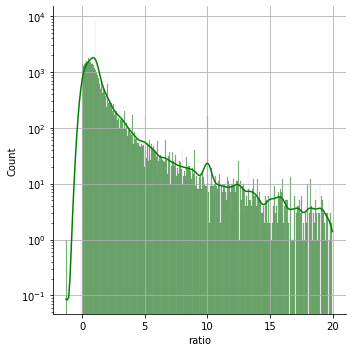

In [16]:
sns.displot(total[total['ratio'] < 20], x="ratio",
            #kind="kde", 
            log_scale=(False, True),
            kde = True, color = 'g'
            )

plt.grid()
plt.savefig('ratio_log.png')

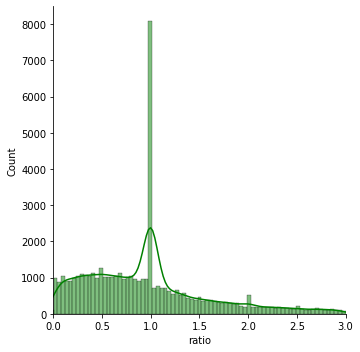

In [82]:
sns.displot(total[total['ratio'] < 3], x="ratio",
            #kind="kde",
            #log_scale=(False, True),
            kde = True, color = 'g')
plt.xlim(0, 3)
plt.savefig('ratio_below3.png')

In [59]:
total1 = total[total['value_F'] < 1000]
total1 = total1[total1['value_H'] < 1000]
total1 = total1[total1['value_H'] > 1]
total1 = total1[total1['value_F'] > 1]

total2 = total[total['value_F'] < 10]
total2 = total2[total2['value_H'] < 10]

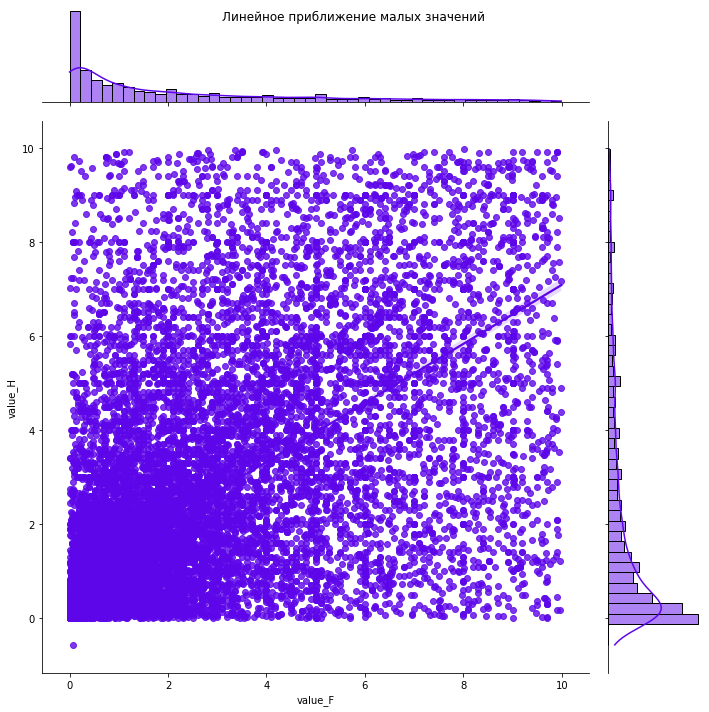

In [83]:
p = sns.jointplot(data=total2,
              x="value_F", y="value_H", kind="reg", color="#5d06e9", height=10)
p.fig.suptitle('Линейное приближение малых значений')
plt.savefig('joint_small.png')

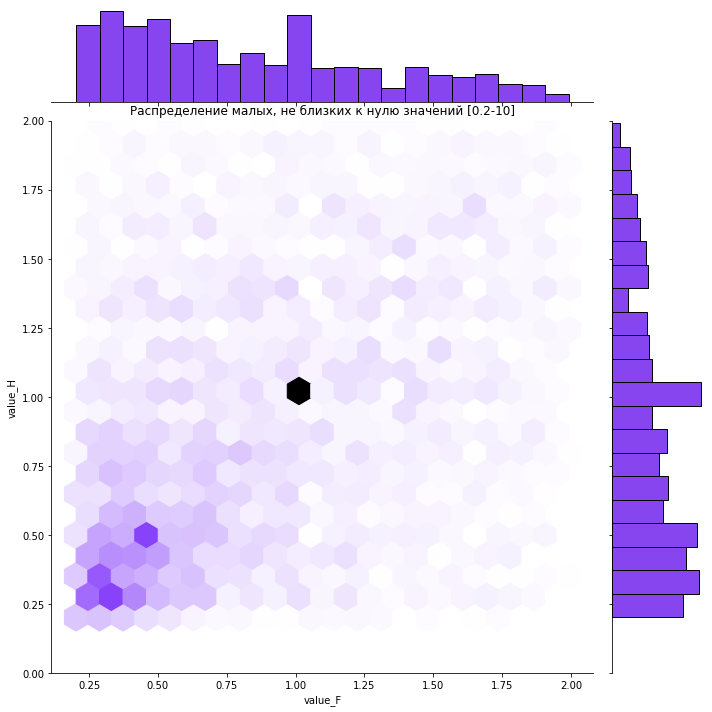

In [81]:
sns.jointplot(data=total2[(total2['value_F'] < 2) & (total2['value_H'] < 2)& (total2['value_H'] > 0.2)& (total2['value_F'] > 0.2)],
              x="value_F", y="value_H", kind="hex", color="#5d06e9", height=10, ylim=(0, 2))
plt.title('Распределение малых, не близких к нулю значений [0.2-10]')
plt.savefig('hex_small.png')

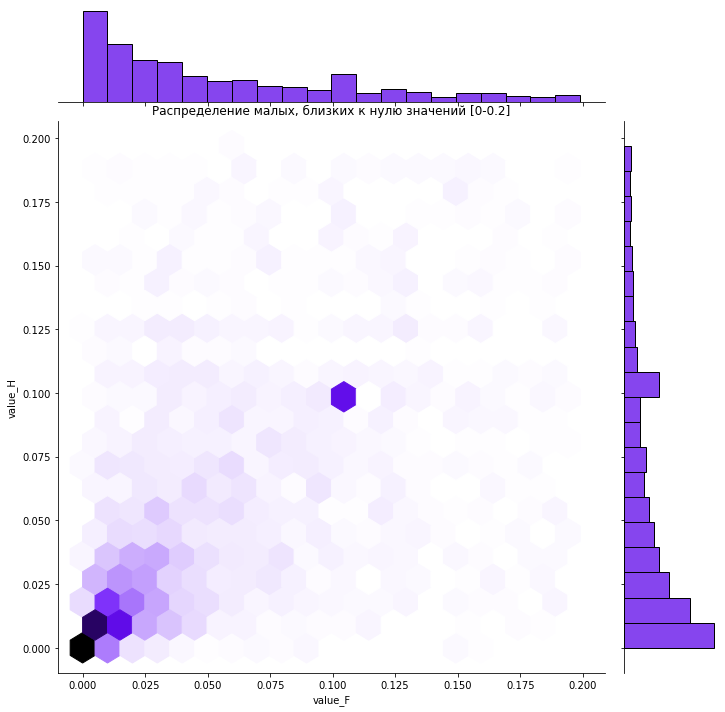

In [74]:
sns.jointplot(data=total2[(total2['value_H'] < 0.2)& (total2['value_F'] < 0.2)& (total2['value_H'] > 0)],
              x="value_F", y="value_H", kind="hex", color="#5d06e9", height=10)
plt.title('Распределение малых, близких к нулю значений [0-0.2]')
plt.savefig('hex_smallest.png')

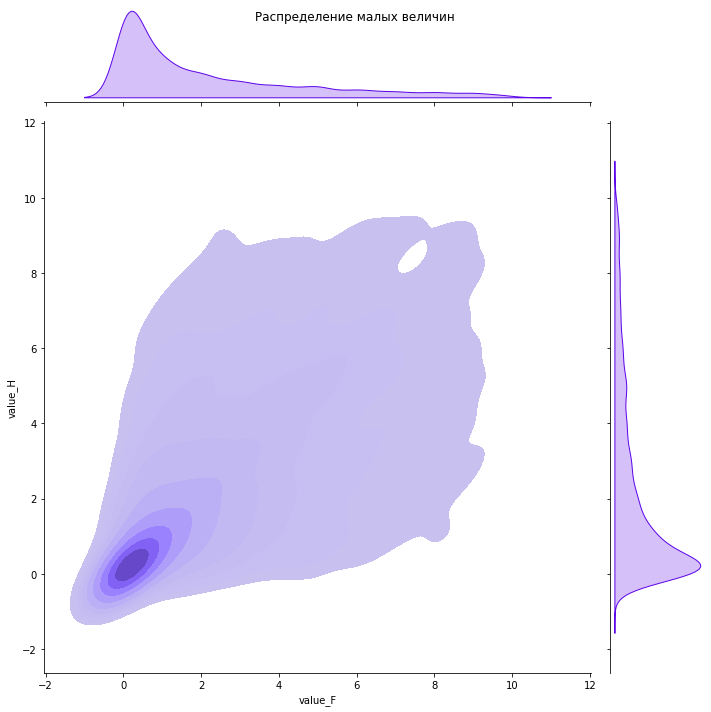

In [80]:
p = sns.jointplot(data=total2,
              x="value_F", y="value_H", kind="kde", color="#5d06e9", height=10, fill=True)
p.fig.suptitle("Распределение малых величин")
plt.savefig('kde_small.png')

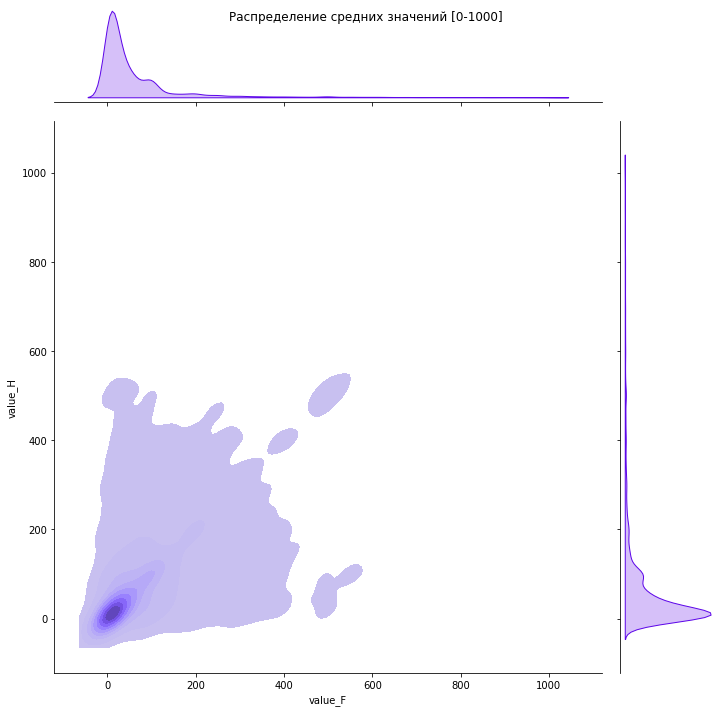

In [79]:
p = sns.jointplot(data=total1,
              x="value_F", y="value_H", kind="kde", color="#5d06e9", height=10, fill=True)
p.fig.suptitle('Распределение средних значений [0-1000]')
plt.savefig('kde.png')